In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


In [2]:
path = "C:/Windows/Fonts/malgun.ttf"

import platform

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv',
                           encoding = 'utf-8', thousands=',',
                           names = ['data', 'hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
data,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


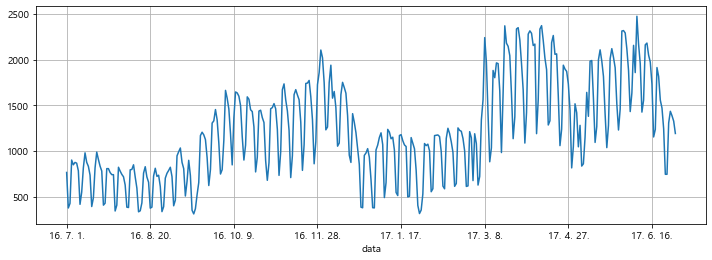

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [5]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [6]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [7]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


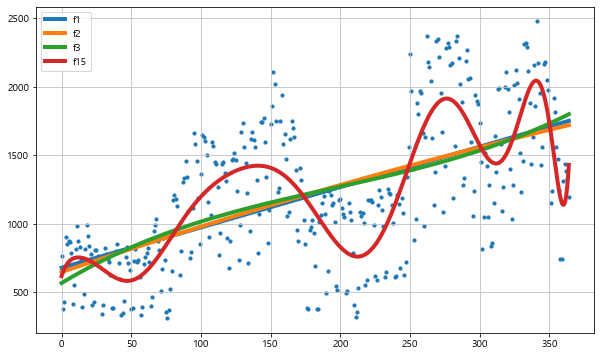

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

In [9]:
pinkwink_web

,hit
data,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0


In [10]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['data']

df

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0
...,...,...
360,2017-06-26,1309.0
361,2017-06-27,1436.0
362,2017-06-28,1387.0
363,2017-06-29,1328.0


In [11]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['data']

m = Prophet(yearly_seasonality=True)
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,912.761130,701.365444,1127.977187
421,2017-08-26,497.711704,279.742543,704.065677
422,2017-08-27,630.268176,409.266521,837.863560
423,2017-08-28,1182.888299,973.403127,1404.174646
424,2017-08-29,1218.800002,1009.389574,1419.399094


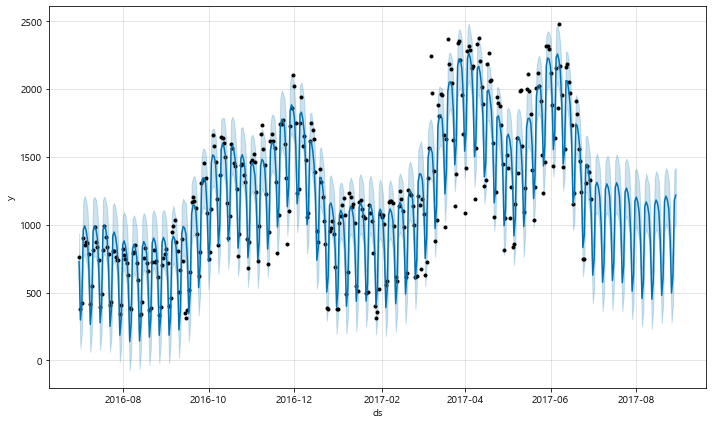

In [14]:
m.plot(forecast);

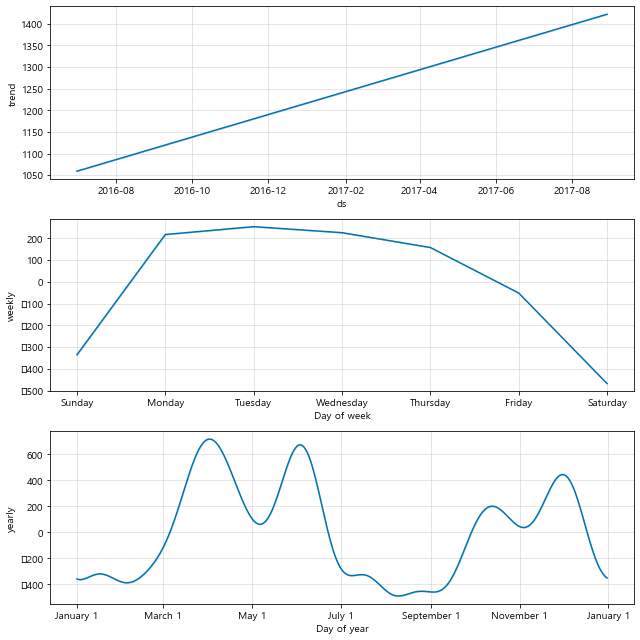

In [15]:
m.plot_components(forecast);

In [16]:
'''
start = datetime(2003, 1, 1)
end = datetime(2017,6,30)

KIA = web.DataReader('KRX:000270', 'google', start, end)
KIA.head()
'''

from pandas_datareader import data
import yfinance as yf
yf.pdr_override()

start_date = '2003-01-01' 
end_date = '2019-12-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-06-18,79400.0,80500.0,79300.0,80000.0,80000.0,1758207
2012-06-19,80000.0,80400.0,79500.0,80000.0,80000.0,1075002
2012-06-20,80900.0,81000.0,79600.0,80000.0,80000.0,885863
2012-06-21,79700.0,80300.0,78700.0,78800.0,78800.0,787586
2012-06-22,77900.0,78200.0,77200.0,77500.0,77500.0,1091383


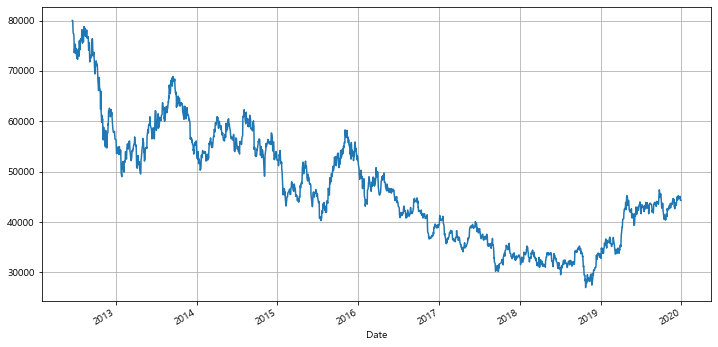

In [17]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [18]:
KIA_trunc = KIA[:'2018-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-06-18,79400.0,80500.0,79300.0,80000.0,80000.0,1758207
2012-06-19,80000.0,80400.0,79500.0,80000.0,80000.0,1075002
2012-06-20,80900.0,81000.0,79600.0,80000.0,80000.0,885863
2012-06-21,79700.0,80300.0,78700.0,78800.0,78800.0,787586
2012-06-22,77900.0,78200.0,77200.0,77500.0,77500.0,1091383
...,...,...,...,...,...,...
2018-12-21,33950.0,34000.0,33450.0,33850.0,33850.0,918578
2018-12-24,33850.0,34000.0,33200.0,33500.0,33500.0,727995
2018-12-26,33100.0,33800.0,32650.0,33400.0,33400.0,1153454


In [19]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2012-06-18,80000.0
1,2012-06-19,80000.0
2,2012-06-20,80000.0
3,2012-06-21,78800.0
4,2012-06-22,77500.0


In [20]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [21]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1963,2019-12-24
1964,2019-12-25
1965,2019-12-26
1966,2019-12-27
1967,2019-12-28


In [22]:
#책에 없는 코드

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1963,2019-12-24,26319.595872,11170.708681,41455.443120
1964,2019-12-25,26237.699393,11427.942963,41271.650220
1965,2019-12-26,26067.244665,10808.339021,41302.673234
1966,2019-12-27,25994.763531,10853.354480,40705.611517
1967,2019-12-28,25876.659505,10903.031377,40718.593027


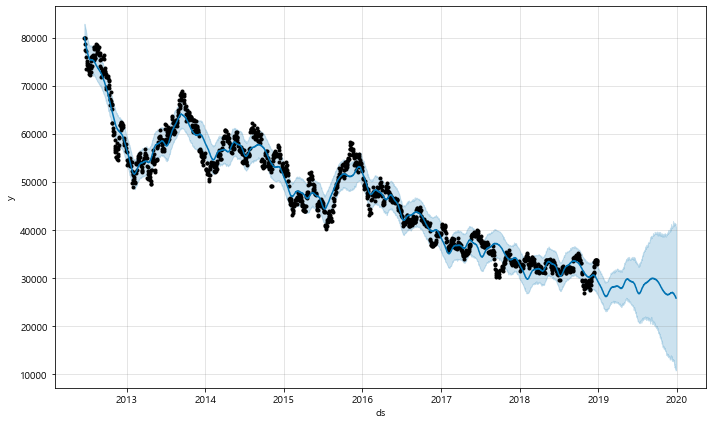

In [23]:
m.plot(forecast);

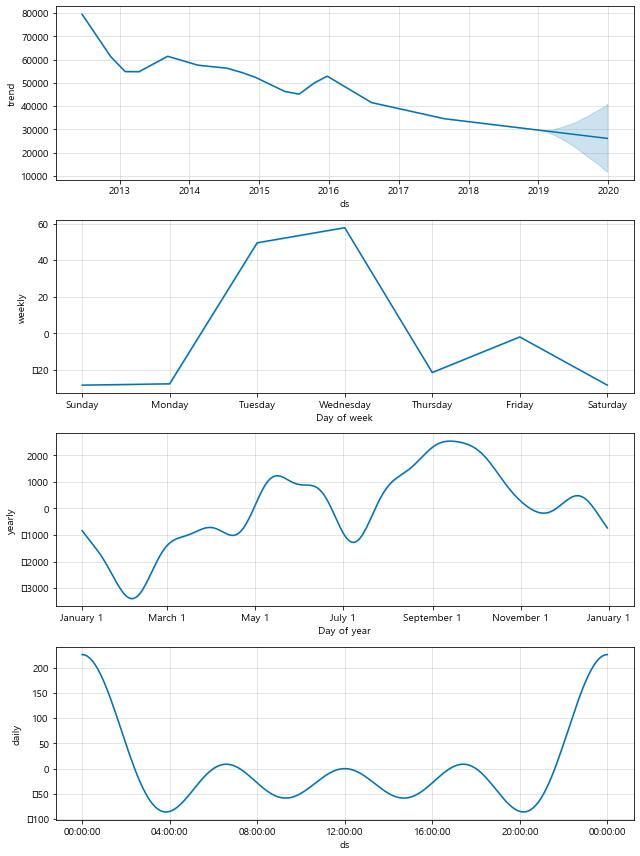

In [24]:
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 completed


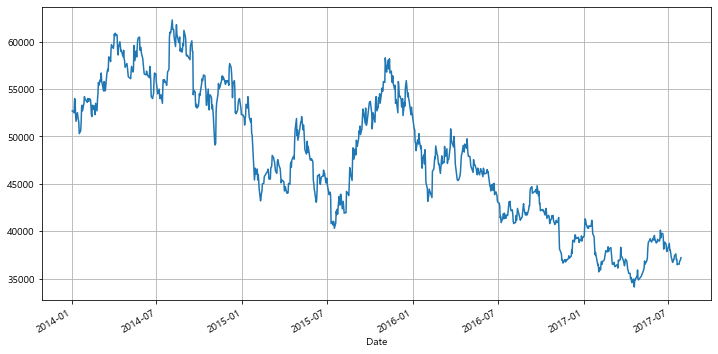

In [25]:
start_date = '2014-01-01' 
end_date = '2017-07-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize = (12,6), grid=True)

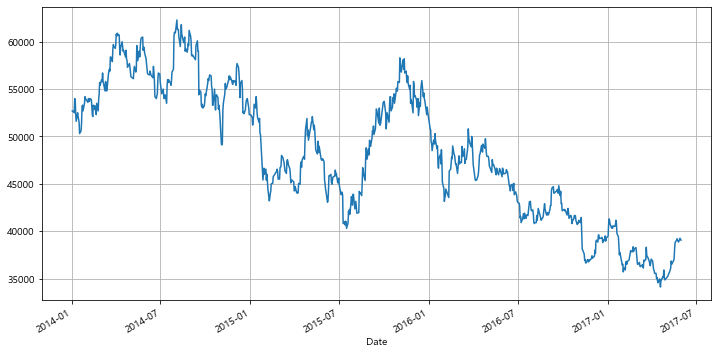

In [26]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize = (12,6), grid=True);

In [27]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [28]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [29]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


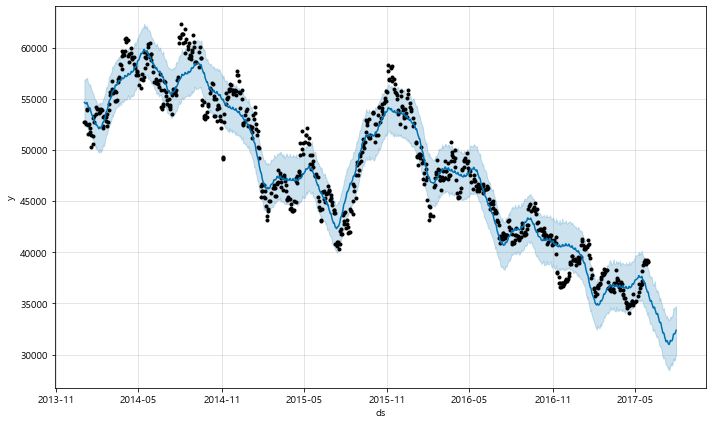

In [30]:
forecast = m.predict(future)
m.plot(forecast);

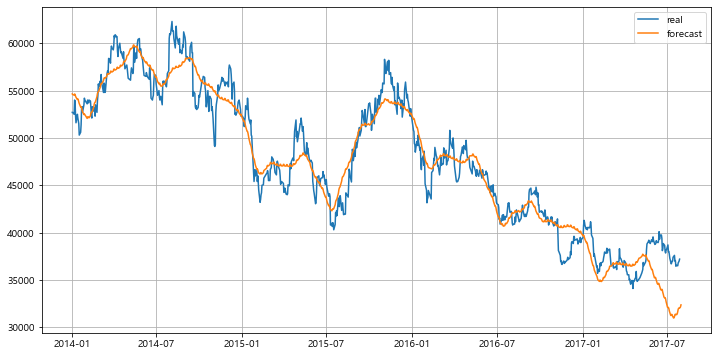

In [31]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [33]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [34]:
df['cap'] = 8.5

In [36]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

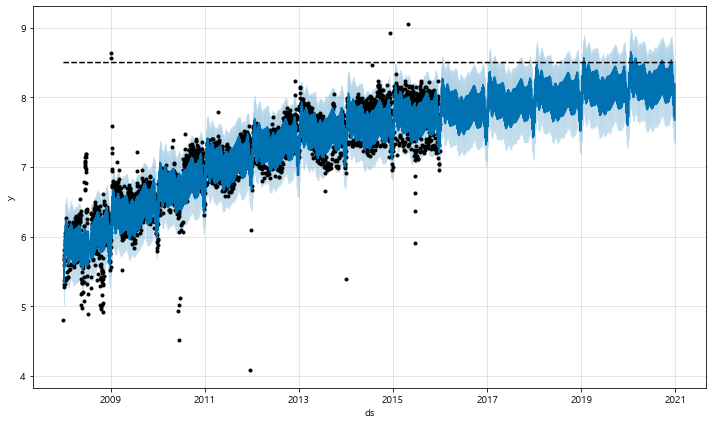

In [38]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

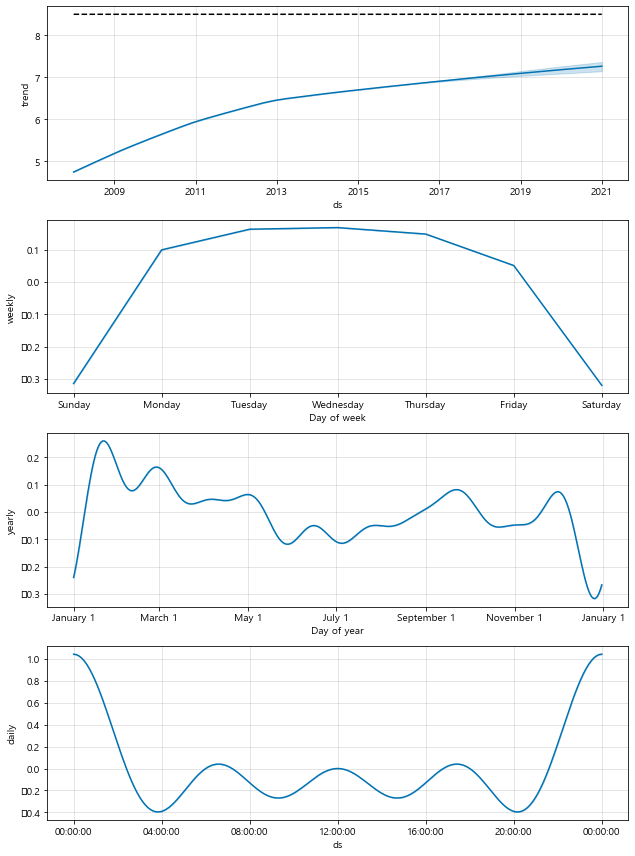

In [41]:
forecast = m.predict(future)
m.plot_components(forecast);